# ARIEL: Utility Functions

In [1]:
# Third-party libraries
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Perlin Noise

In [2]:
# Local libraries
from ariel.utils.noise_gen import PerlinNoise

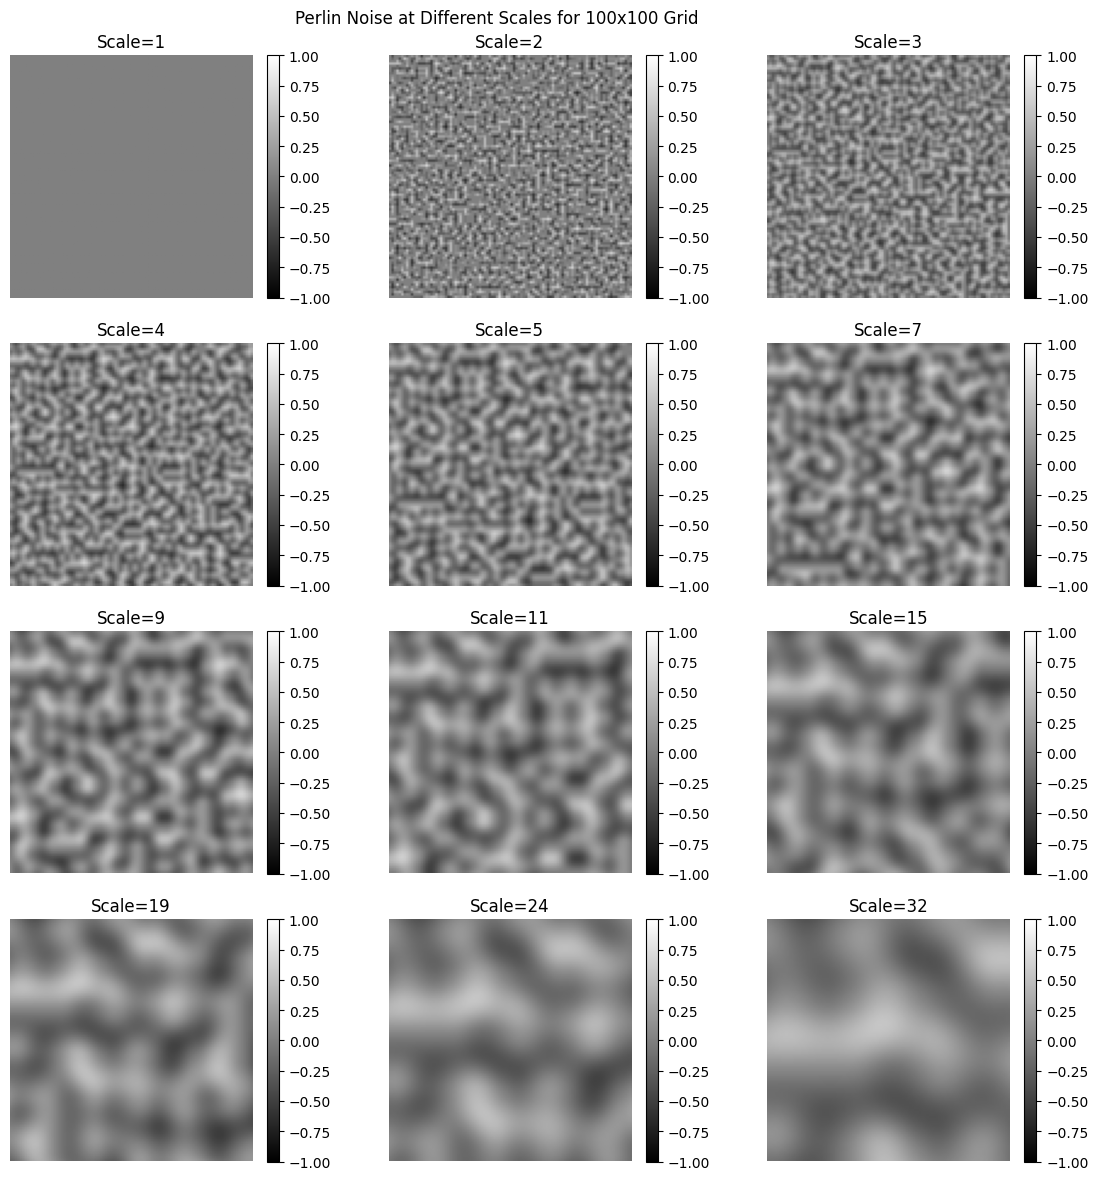

In [3]:
# Perlin noise parameters
noise = PerlinNoise(seed=1234)
width, height = 100, 100

# Plot parameters
log_range = np.logspace(0, 5, num=15, base=2, dtype=int)
log_range = np.unique(log_range)  # Remove duplicates
cols = 3
num_of_modes = len(log_range)
fig_size = int(np.ceil(num_of_modes / cols))
fig, axes = plt.subplots(fig_size, cols, figsize=(12, 12))
ax = axes.ravel()
ax_filled = np.zeros(len(ax))

for i, scale in enumerate(log_range):
    grid = noise.as_grid(width, height, scale=scale)
    im = ax[i].imshow(grid, cmap="gray", origin="upper")
    im.set_clim(-1, 1)
    ax[i].axis("off")
    ax_filled[i] = 1
    ax[i].set_title(f"Scale={scale}")
    fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)

# Remove empty subplots
for ax_i, filled in enumerate(ax_filled):
    if filled == 0:
        fig.delaxes(ax[ax_i])

fig.suptitle(f"Perlin Noise at Different Scales for {width}x{height} Grid")
plt.tight_layout()
plt.show()